## DT on Mushrooms dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn.model_selection as cv
import sklearn              

In [2]:
## Load dataset
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
## Separate data from labels
X=data.drop(['class'], axis=1)
y=data['class']

print(X.shape)
X.head()

(8124, 22)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [4]:
## Transform to numerical dataset
Xn=pd.get_dummies(X)
Xn.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
## Split into training and tesr
(X_train, X_test,  y_train, y_test) = cv.train_test_split(Xn, y, test_size=.3, random_state=1)

In [6]:
## Train Naive Bayes model
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
from statsmodels.stats.proportion import proportion_confint

clf = BernoulliNB()
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')
scores = sklearn.model_selection.cross_val_score(clf, Xn, y, cv=10)
print(scores)
print(np.mean(scores))

[[1230    6]
 [ 136 1066]]

Accuracy: 0.941755537326

             precision    recall  f1-score   support

          e       0.90      1.00      0.95      1236
          p       0.99      0.89      0.94      1202

avg / total       0.95      0.94      0.94      2438

[ 0.63591636  0.88929889  0.99384994  0.9901599   0.93357934  0.9200492   1.
  0.99753695  0.88039457  0.96917386]
0.920995900838


[[1236    0]
 [   0 1202]]

Accuracy on test set: 1.0

             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1236
          p       1.00      1.00      1.00      1202

avg / total       1.00      1.00      1.00      2438

Confidence interval:  (0.9984561344599041, 1)


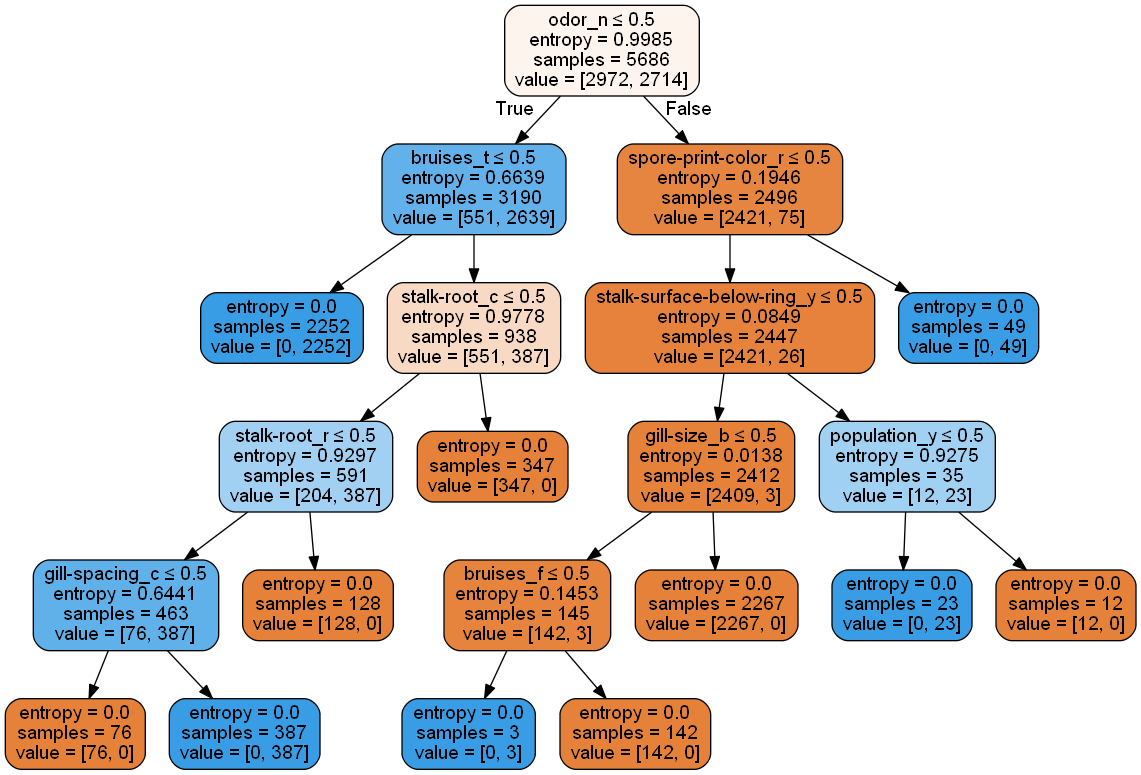

In [7]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  

clf = tree.DecisionTreeClassifier(criterion='entropy')
pred = clf.fit(X_train, y_train).predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, pred))
print()
print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Confidence interval: ",proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

#scores = sklearn.model_selection.cross_val_score(clf, Xn, y, cv=10)
#print("Accuracy on 10 fold cross-validation:", scores)
#print(np.mean(scores))

## Print tree
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,    
                         filled=True, rounded=True,
                         feature_names=list(Xn.columns.values),  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  
